In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (325/325), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 325 (delta 165), reused 263 (delta 162), pack-reused 0
Receiving objects: 100% (325/325), 2.23 MiB | 13.79 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.6 MB/s eta 0:00:00


In [3]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [13]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6o56nyWTAwGMezM35aKY")
project = rf.workspace("swinburne-university-of-technology-vlvyi").project("ozfish-gbspd")
version = project.version(5)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ozfish-5 in yolov9:: 100%|██████████| 9152/9152 [00:01<00:00, 5792.46it/s]


In [16]:
%cd {HOME}/yolov9
import torch
torch.cuda.empty_cache()
!python train.py \
--batch 16 --epochs 50 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-e.pt \
--cfg models/detect/gelan-e.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-05-17 08:59:08.853110: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-17 08:59:08.853168: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-17 08:59:08.855062: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-17 08:59:09.986038: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-e.pt, cfg=models/detect/gelan-e.yaml, data=/content/yolov9/ozfish-5/data.yaml, hyp=hyp.scratch-high.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, nova

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls {HOME}/yolov9/runs/train/exp/

events.out.tfevents.1715932107.5388f10c6a0f.2408.0  labels.jpg	 train_batch0.jpg  weights
hyp.yaml					    opt.yaml	 train_batch1.jpg
labels_correlogram.jpg				    results.csv  train_batch2.jpg


In [20]:
# prompt: save file to the drive

!cp /content/yolov9/runs/train/exp7/weights/best.pt /content/drive/MyDrive/best_Fish_NoFish.pt

!zip -r /content/runs.zip /content/yolov9/runs

!scp /content/runs.zip /content/drive/MyDrive/runs.zip

  adding: content/yolov9/runs/ (stored 0%)
  adding: content/yolov9/runs/train/ (stored 0%)
  adding: content/yolov9/runs/train/exp/ (stored 0%)
  adding: content/yolov9/runs/train/exp/weights/ (stored 0%)
  adding: content/yolov9/runs/train/exp/weights/last.pt (deflated 7%)
  adding: content/yolov9/runs/train/exp/weights/best.pt (deflated 7%)
  adding: content/yolov9/runs/train/exp/labels_correlogram.jpg (deflated 30%)
  adding: content/yolov9/runs/train/exp/train_batch0.jpg (deflated 6%)
  adding: content/yolov9/runs/train/exp/events.out.tfevents.1715932107.5388f10c6a0f.2408.0 (deflated 95%)
  adding: content/yolov9/runs/train/exp/train_batch2.jpg (deflated 4%)
  adding: content/yolov9/runs/train/exp/results.csv (deflated 69%)
  adding: content/yolov9/runs/train/exp/opt.yaml (deflated 49%)
  adding: content/yolov9/runs/train/exp/labels.jpg (deflated 31%)
  adding: content/yolov9/runs/train/exp/hyp.yaml (deflated 42%)
  adding: content/yolov9/runs/train/exp/train_batch1.jpg (deflated 

In [33]:
%cd {HOME}/yolov9
import torch
torch.cuda.empty_cache()
!python train.py \
--batch 16 --epochs 40 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp7/weights/best.pt \
--cfg models/detect/gelan-e.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-05-17 11:01:44.211909: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-17 11:01:44.211965: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-17 11:01:44.213515: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-17 11:01:45.306695: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/yolov9/runs/train/exp7/weights/best.pt, cfg=models/detect/gelan-e.yaml, data=/content/yolov9/ozfish-5/data.yaml, hyp=hyp.scratch-high.yaml, epochs=40, batch_size=16, imgsz=640, rect=False, resume=False

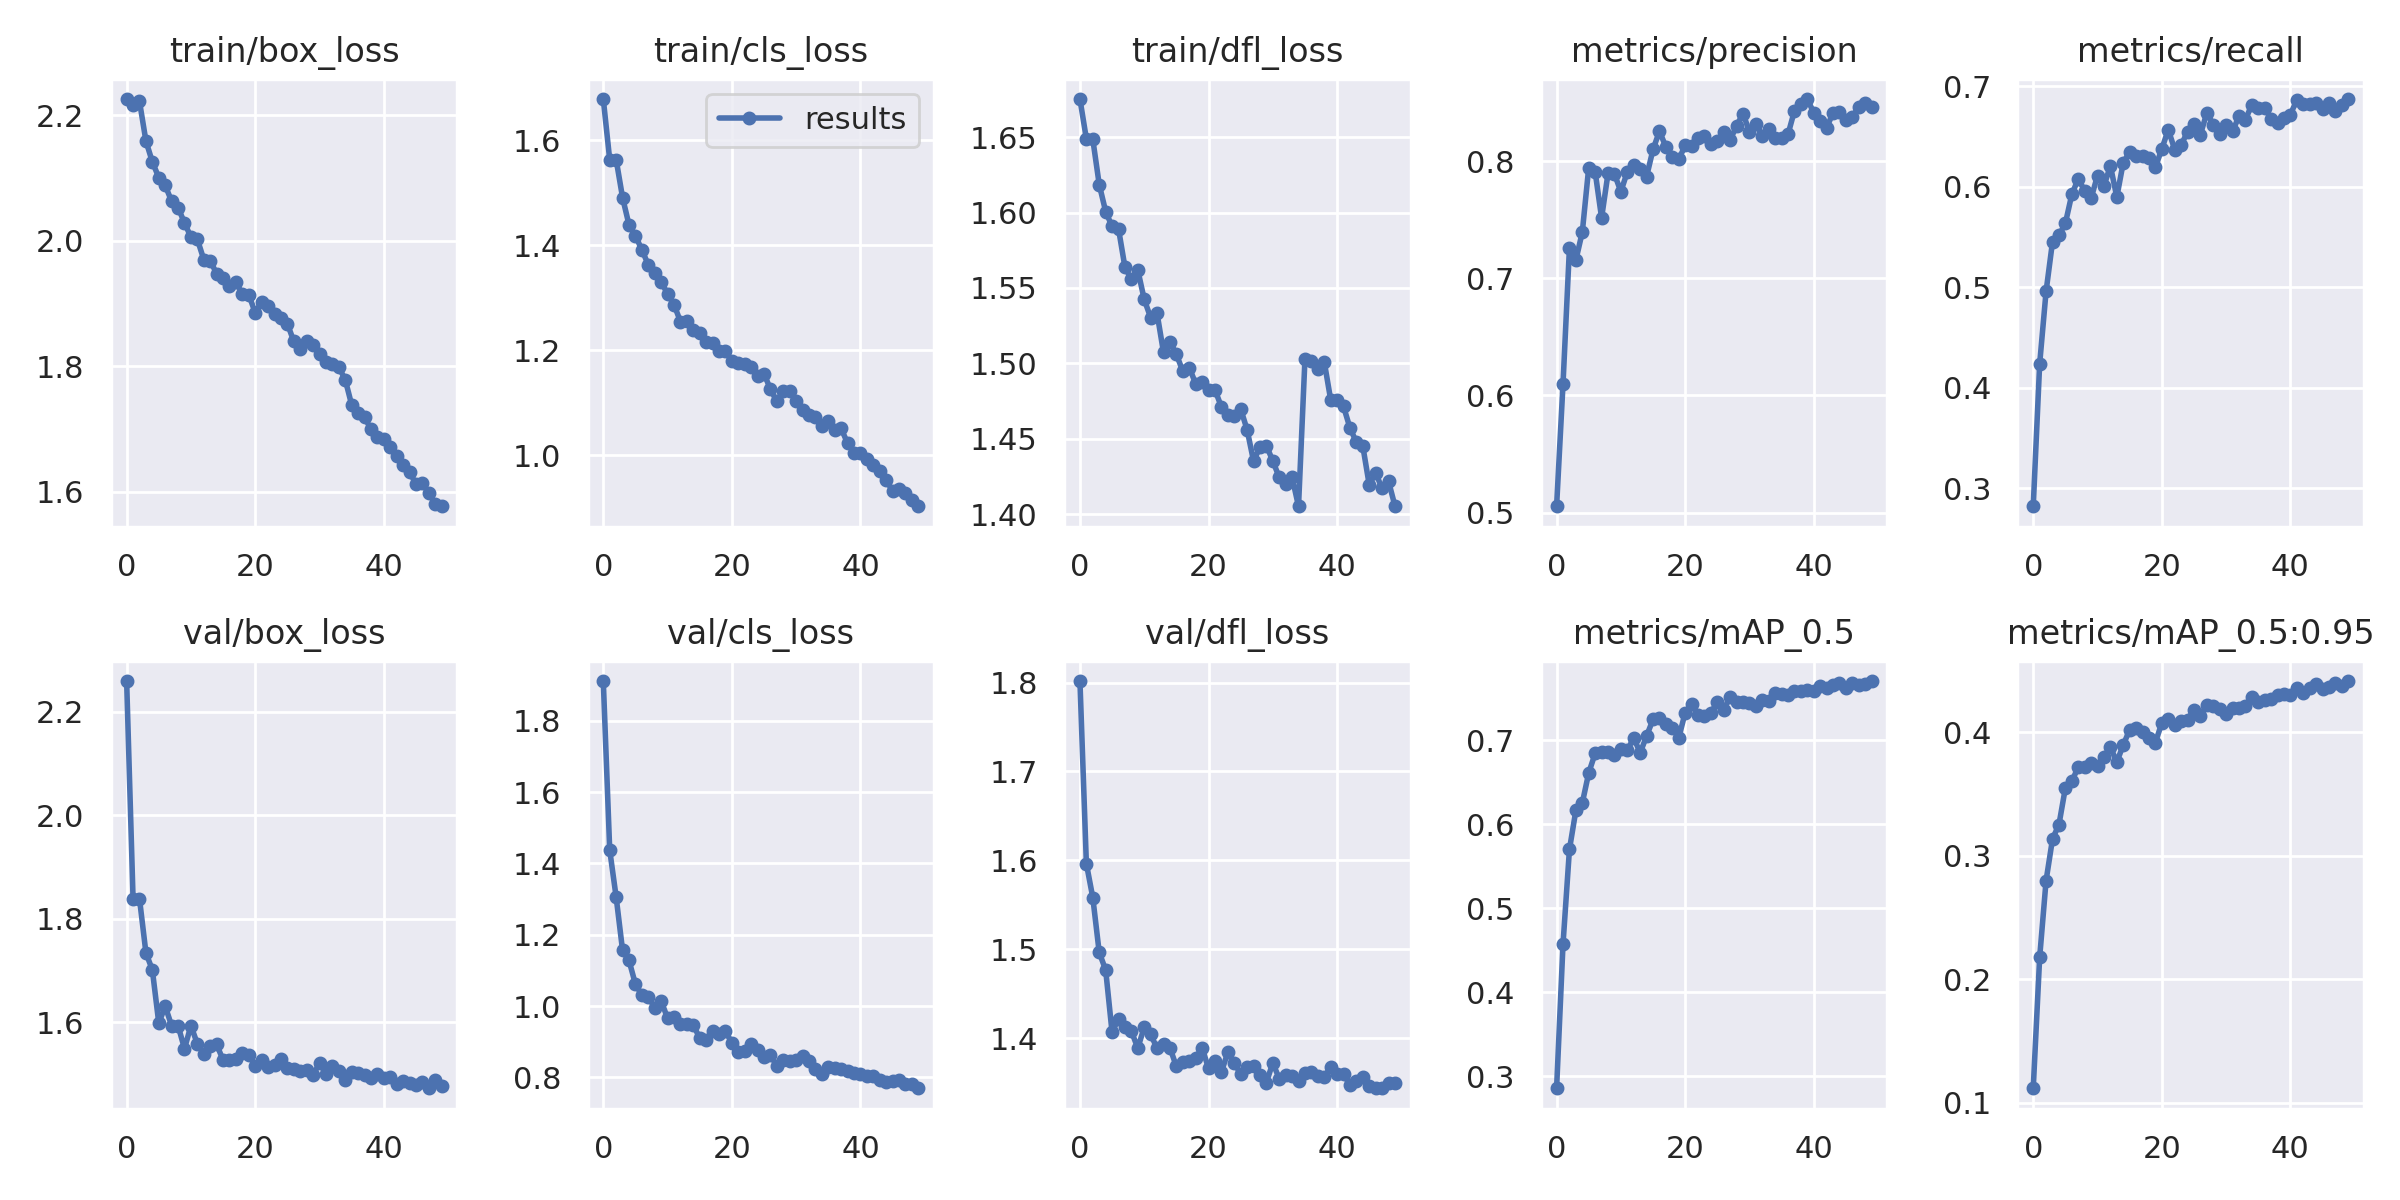

In [22]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp7/results.png", width=1000)

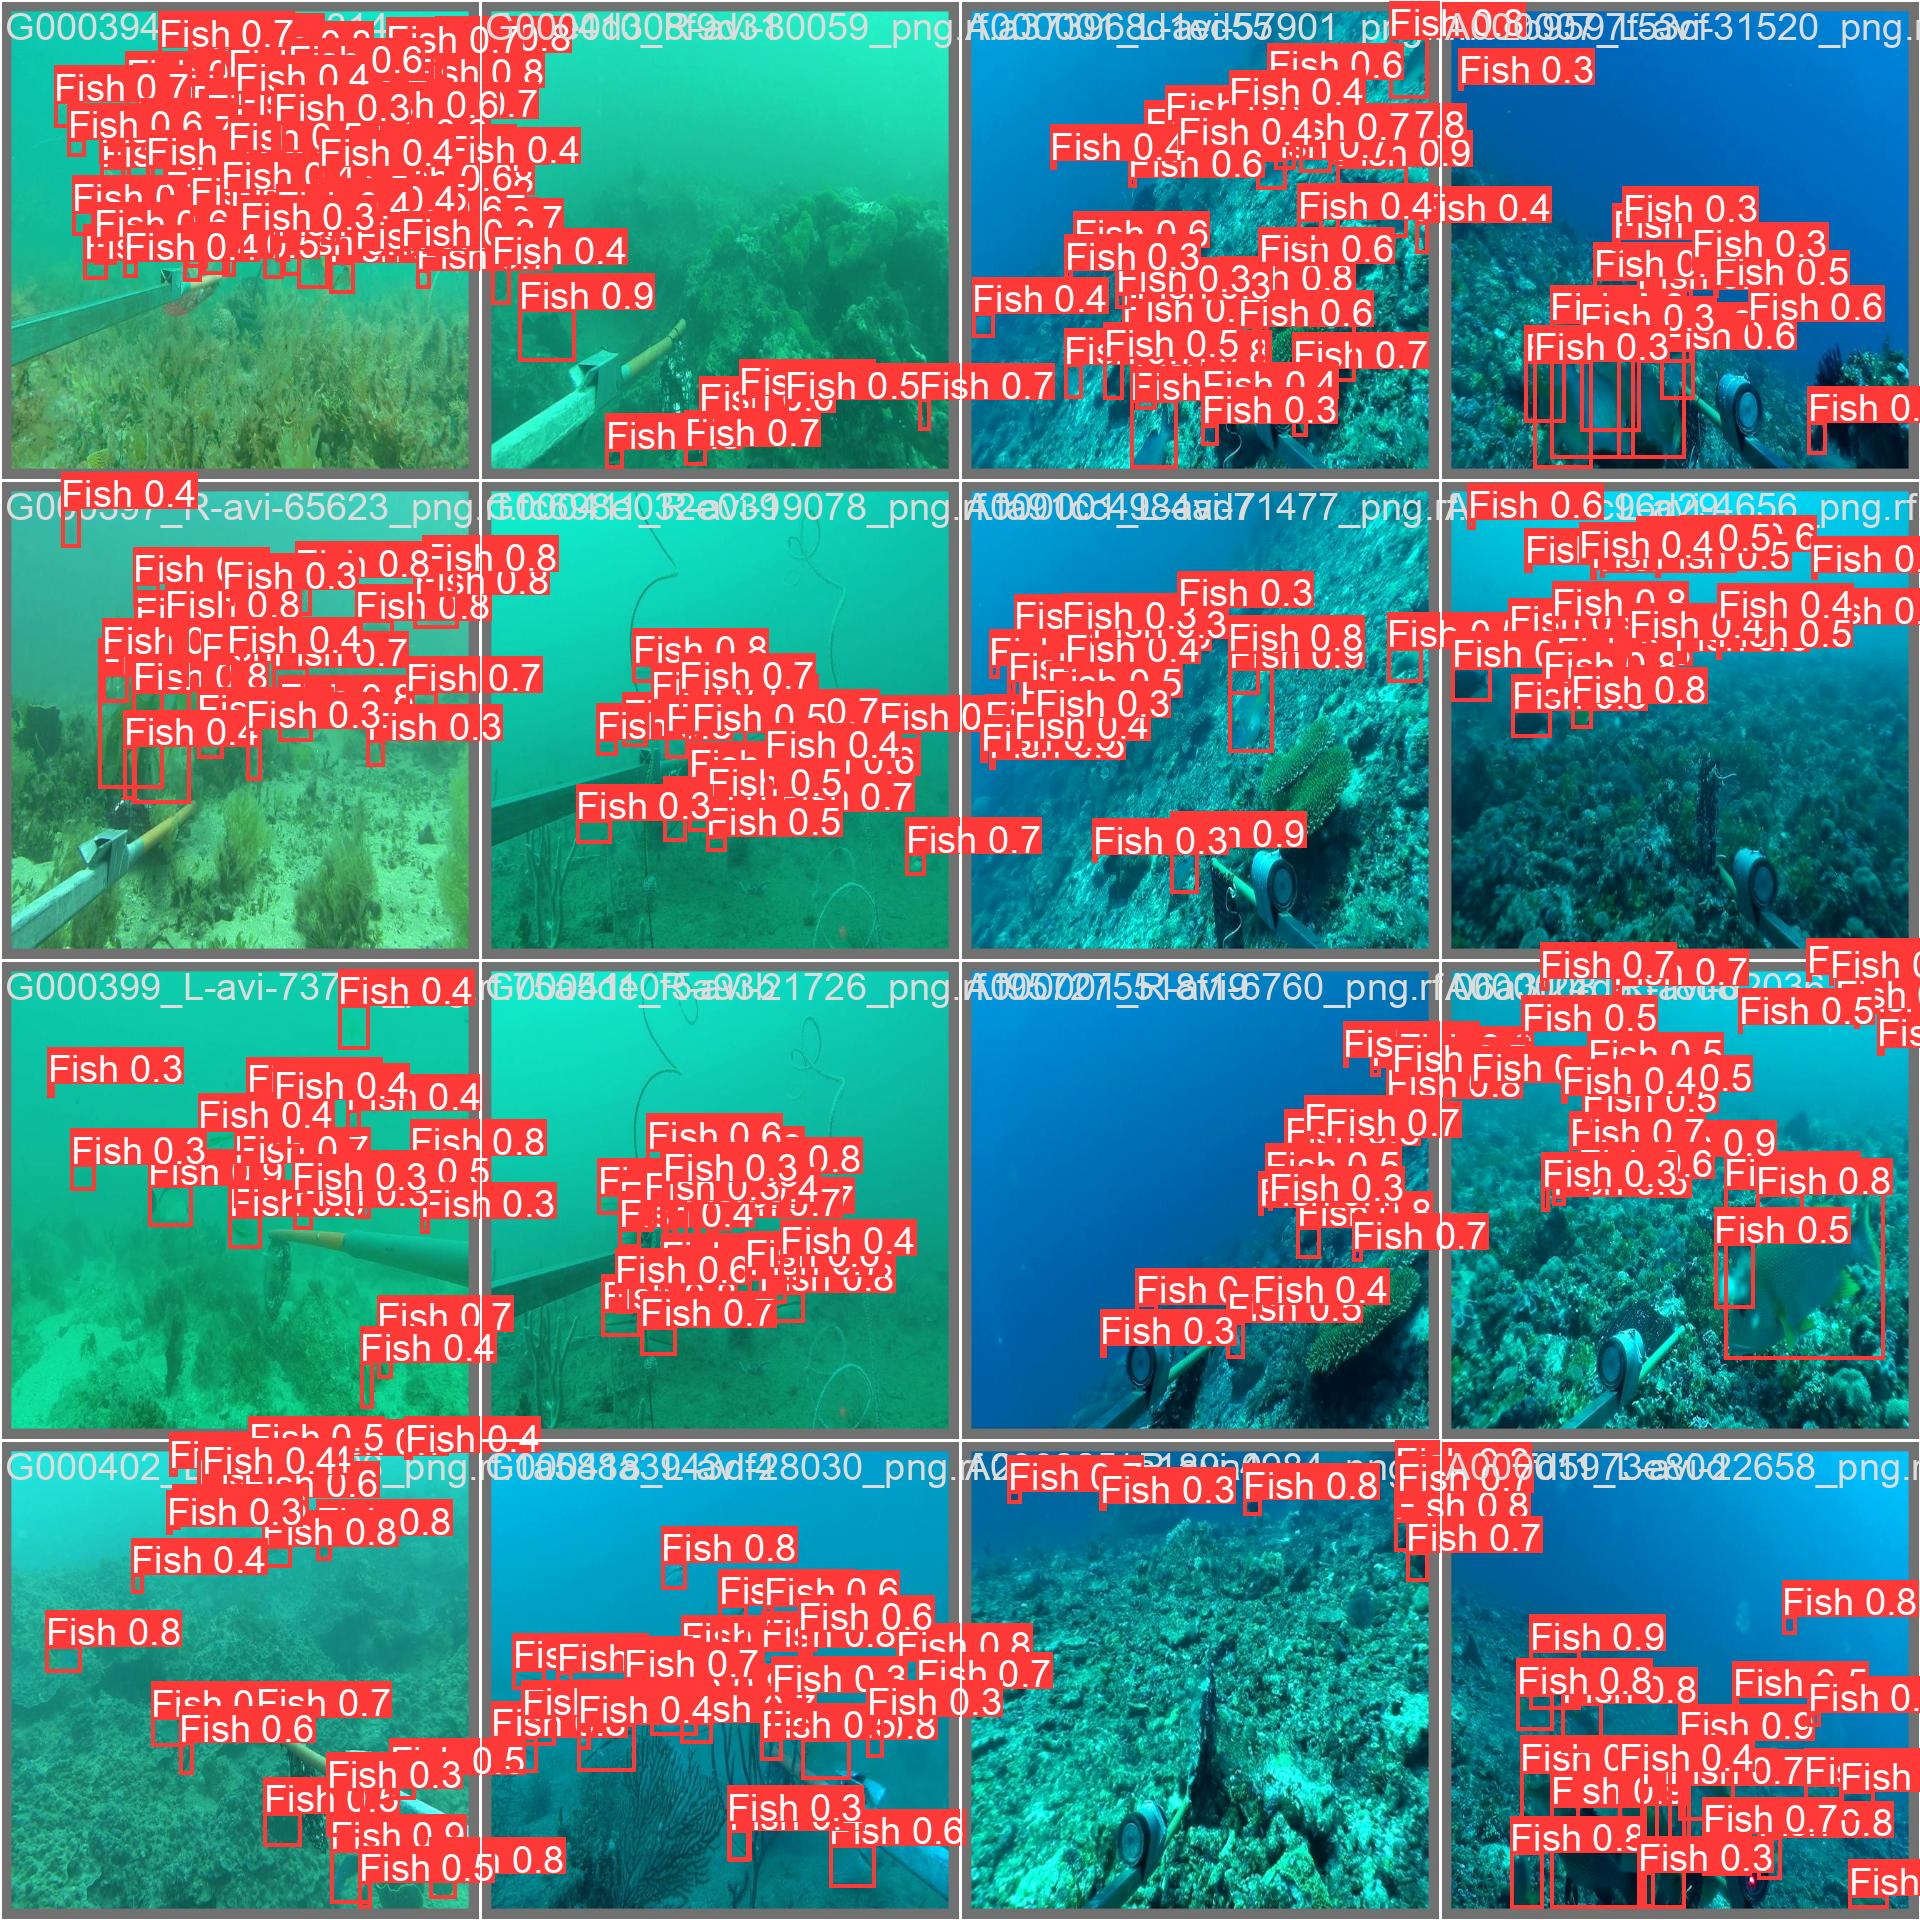

In [24]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp7/val_batch0_pred.jpg", width=1000)

### Validation

In [28]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp7/weights/best.pt

/content/yolov9
val: data=/content/yolov9/ozfish-5/data.yaml, weights=['/content/yolov9/runs/train/exp7/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
gelan-e summary: 930 layers, 58002835 parameters, 0 gradients, 190.8 GFLOPs
val: Scanning /content/yolov9/ozfish-5/valid/labels.cache... 176 images, 3 backgrounds, 0 corrupt: 100% 176/176 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Imag

### Inference

In [27]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp7/weights/best.pt \
--source {dataset.location}/test/images

detect: weights=['/content/yolov9/runs/train/exp7/weights/best.pt'], source=/content/yolov9/ozfish-5/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
gelan-e summary: 930 layers, 58002835 parameters, 0 gradients, 190.8 GFLOPs
image 1/176 /content/yolov9/ozfish-5/test/images/A000002_L-avi-80771_png.rf.0c996dd03939afd48ae50c175abbf9e8.jpg: 1280x1280 15 Fishs, 37.7ms
image 2/176 /content/yolov9/ozfish-5/test/images/A000002_R-avi-85929_png.rf.2388e33cac8dc5dd9b6ab86db730c217.jpg: 1280x1280 27 Fishs, 37.6ms
image 3/176 /content/

### Detection Samples

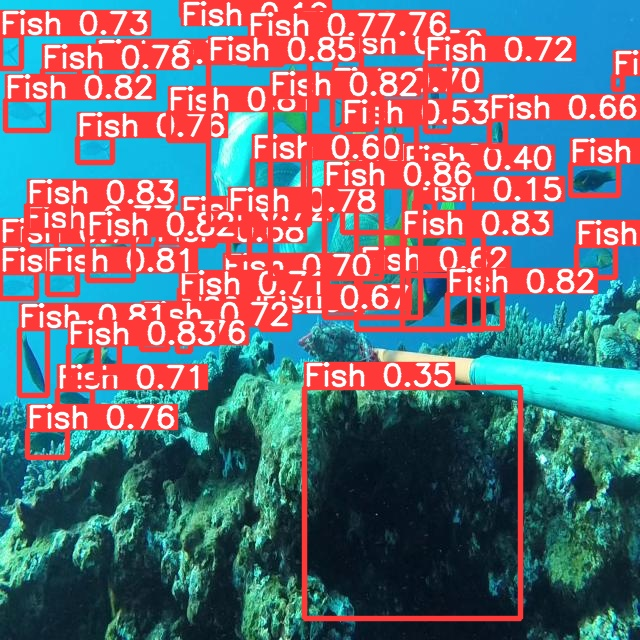

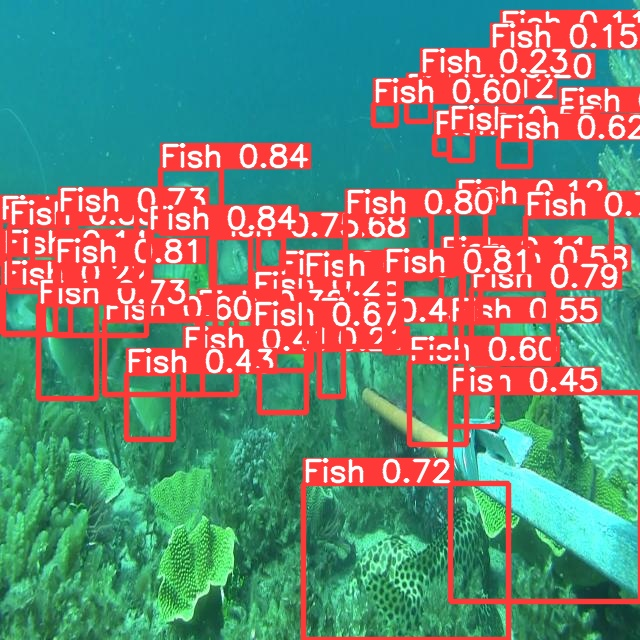

In [29]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))

In [30]:
!python detect.py --weights {HOME}/yolov9/runs/train/exp7/weights/best.pt --source /content/drive/MyDrive/BRUVS.mp4 --device 0

detect: weights=['/content/yolov9/runs/train/exp7/weights/best.pt'], source=/content/drive/MyDrive/BRUVS.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
gelan-e summary: 930 layers, 58002835 parameters, 0 gradients, 190.8 GFLOPs
video 1/1 (1/4389) /content/drive/MyDrive/BRUVS.mp4: 384x640 8 Fishs, 273.7ms
video 1/1 (2/4389) /content/drive/MyDrive/BRUVS.mp4: 384x640 9 Fishs, 40.6ms
video 1/1 (3/4389) /content/drive/MyDrive/BRUVS.mp4: 384x640 8 Fishs, 36.6ms
video 1/1 (4/4389) /content/drive/MyDrive/BRUVS.mp4: 384x640 8 Fishs, 36.6ms

In [31]:
# prompt: save file to the drive

!cp /content/yolov9/runs/detect/exp2/BRUVS.mp4 /content/drive/MyDrive/BRUVS_detected3.mp4
